In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
!pip install spectral

     |████████████████████████████████| 184kB 9.2MB/s 
  Created wheel for spectral: filename=spectral-0.22.2-cp37-none-any.whl size=212938 sha256=7999aff0bcc074dae8f0e8018cffdeef696aeb7f7c46a5e134fc0ebefbfed85b
  Stored in directory: /root/.cache/pip/wheels/fb/00/da/ac778d1ab6e196cb7f56d104d4dfdfc0aad4e2b208275c0726
Successfully built spectral


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import spectral as sp

In [22]:
indiana_img = np.load('/content/drive/MyDrive/data/indianapines.npy')
indiana_labels = np.load('/content/drive/MyDrive/data/indianapines_gt.npy')
salinas_img = np.load('/content/drive/MyDrive/data/salinas.npy')
salinas_labels = np.load('/content/drive/MyDrive/data/salinas_gt.npy')

In [23]:
# normalize radiance values to get reflectance values
indiana_img = indiana_img / indiana_img.max()
salinas_img = salinas_img / salinas_img.max()

In [24]:
print("Indiana shape: {}".format(indiana_img.shape))
print("Salinas shape: {}".format(salinas_img.shape))

Indiana shape: (145, 145, 200)
Salinas shape: (512, 217, 204)


In [25]:
X_indiana = indiana_img.reshape((-1, indiana_img.shape[-1])) # reshaping the HSI as a 2D matrix
print("Indiana shape: {}".format(X_indiana.shape))

X_salinas = salinas_img.reshape((-1, salinas_img.shape[-1])) # reshaping the HSI as a 2D matrix
print("Salinas shape: {}".format(X_salinas.shape))

Indiana shape: (21025, 200)
Salinas shape: (111104, 204)


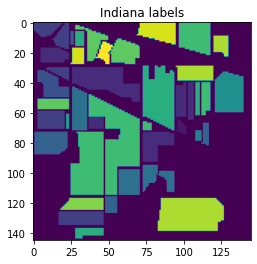

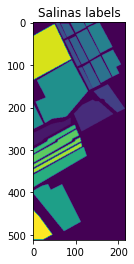

In [26]:
plt.imshow(indiana_labels)
plt.title("Indiana labels")
plt.show()
plt.imshow(salinas_labels)
plt.title("Salinas labels")
plt.show()

## PCA

In [27]:
def get_number_components(X):
    # first PCA with by keeping all features
    print("Fitting the PCA")
    pca_model = PCA()
    pca_model.fit(X)
    var_cumsum = pca_model.explained_variance_ratio_.cumsum()
    return len(var_cumsum[var_cumsum <= 0.9991])

def extract_features(X, n_components):
    pca_model = PCA(n_components=n_components)
    pca_model.fit(X)
    return pca_model.transform(X)
    

In [28]:
n_components_indiana = get_number_components(X_indiana)
n_components_salinas = get_number_components(X_salinas)

Fitting the PCA
Fitting the PCA


In [29]:
print("Number of components Indiana: {}".format(n_components_indiana))
print("Number of components Salinas: {}".format(n_components_salinas))

Number of components Indiana: 69
Number of components Salinas: 6


In [30]:
X_indiana_reduced = extract_features(X_indiana, n_components_indiana)
X_salinas_reduced = extract_features(X_salinas, n_components_salinas)

In [31]:
print("Indiana reduced data shape: {}".format(X_indiana_reduced.shape))
print("Salinas reduced data shape: {}".format(X_salinas_reduced.shape))

Indiana reduced data shape: (21025, 69)
Salinas reduced data shape: (111104, 6)


## Spectral clustering

In [32]:
n_cluster_indiana = len(np.unique(indiana_labels))
n_cluster_salinas = len(np.unique(salinas_labels))

In [33]:
print("Number of labels Indiana: {}".format(n_cluster_indiana))
print("Number of labels Salinas: {}".format(n_cluster_salinas))

Number of labels Indiana: 17
Number of labels Salinas: 17


In [67]:
X_indiana_reduced_5000 = X_indiana_reduced[5000:10000]
X_indiana_reduced_5000.shape

(5000, 69)

In [68]:
model_indiana = SpectralClustering(n_clusters=n_cluster_indiana, assign_labels='discretize', random_state=0)

In [69]:
model_indiana.fit(X_indiana_reduced_5000)

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=17, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)

In [75]:
preds = model_indiana.labels_
preds += 1

In [79]:
preds_img = np.zeros((indiana_img.shape[0] * indiana_img.shape[1],))
preds_img[5000:10000] = preds

In [81]:
preds_img = preds_img.reshape((indiana_img.shape[0], indiana_img.shape[1]))
preds_img.shape

(145, 145)

In [85]:
labels_img = indiana_labels.flatten()
labels_img[0:5000] = np.zeros((5000,))
labels_img[10000:] = np.zeros((labels_img[10000:].shape[0],))
labels_img = labels_img.reshape((indiana_labels.shape))

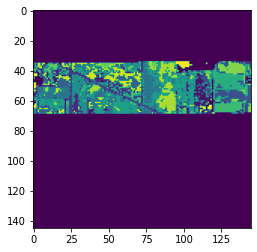

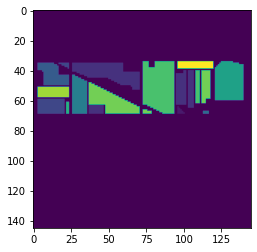

In [87]:
plt.imshow(preds_img)
plt.show()
plt.imshow(labels_img)
plt.show()

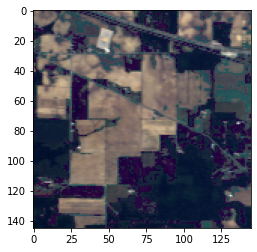

In [66]:
sp.imshow(indiana_img, (29, 19, 9))
plt.show()